# Investigate TMDb movie dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
</ul>

<a id='intro'></a>
## Introduction
* This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. 

In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid", {'axes.grid' : False})

In [113]:
data = pd.read_csv("data/tmdb-movies.csv")

In [114]:
data.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [115]:
data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [116]:
data.shape

(10866, 21)

* The question I am interested to analyze are,
    - Which genres are most popular?
    - Does higher budget movies are more popular?
    - Does higher budget movies earn more revenue?
    - Which directors are associated with most popular movie?

<a id='wrangling'></a>
## Data Wrangling

In [117]:
data_cleaned = data.copy(deep=True)

In [118]:
data.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

* Attribute `homepage` has missing values about 80% of the data. Best option will be to drop it.

In [119]:
data_cleaned.drop('homepage',inplace=True, axis=1)

In [120]:
data_cleaned.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'director', 'tagline', 'keywords', 'overview', 'runtime',
       'genres', 'production_companies', 'release_date', 'vote_count',
       'vote_average', 'release_year', 'budget_adj', 'revenue_adj'],
      dtype='object')

In [26]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 20 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj            

* We should convert release date as datetime

In [121]:
data_cleaned.release_date = pd.to_datetime(data_cleaned.release_date)

In [122]:
data_cleaned.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08


In [123]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 20 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null datetime64[ns]
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj    

<a id='eda'></a>
## Exploratory Data Analysis

### Popular genre

In [138]:
genre_count = {}

In [139]:
def count_genre(s):
    for genre in s.split('|'):
        genre = genre.title()
        genre_count[genre] = genre_count.get(genre, 0) + 1

In [140]:
_ = data_cleaned.genres[~data_cleaned.genres.isna()].apply(count_genre)

In [141]:
genre_count

{'Action': 2385,
 'Adventure': 1471,
 'Science Fiction': 1230,
 'Thriller': 2908,
 'Fantasy': 916,
 'Crime': 1355,
 'Western': 165,
 'Drama': 4761,
 'Family': 1231,
 'Animation': 699,
 'Comedy': 3793,
 'Mystery': 810,
 'Romance': 1712,
 'War': 270,
 'History': 334,
 'Music': 408,
 'Horror': 1637,
 'Documentary': 520,
 'Tv Movie': 167,
 'Foreign': 188}

In [142]:
genre_count = sorted(genre_count.items(), key = lambda x:x[1], reverse=True)

In [143]:
genre_count = dict(genre_count)

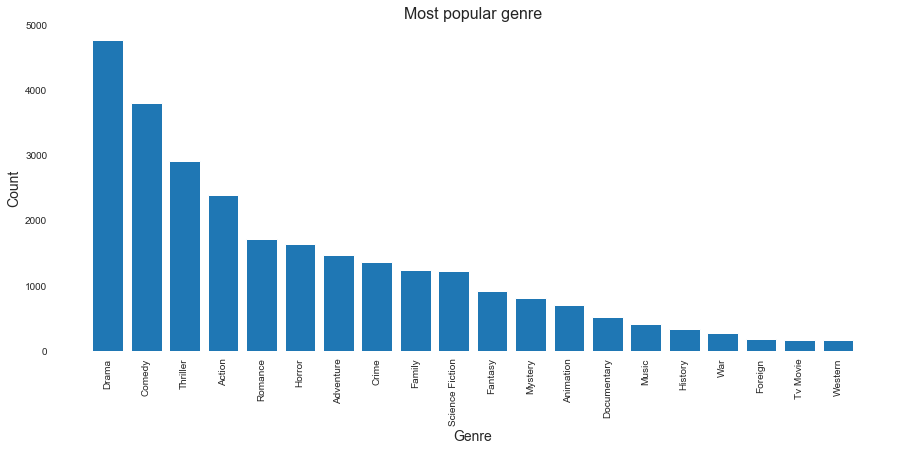

In [150]:
fig, ax = plt.subplots()
fig.set_size_inches(15,6)
plt.bar(range(len(genre_count)), list(genre_count.values()), align='center')
plt.xticks(range(len(genre_count)), list(genre_count.keys()));
plt.xticks(rotation=90);
plt.xlabel("Genre", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Most popular genre", fontsize=16)
for side in ['left', 'right', 'top', 'bottom']:
    ax.spines[side].set_visible(False)

* From the plot we can see that most popular genre is Drama, followed by Comedy and Thriller
* Least popular Genre are Western and TV movies

### Does higher budget movies are more popular?

In [200]:
x_padding = 5000000

C:\Users\davep\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


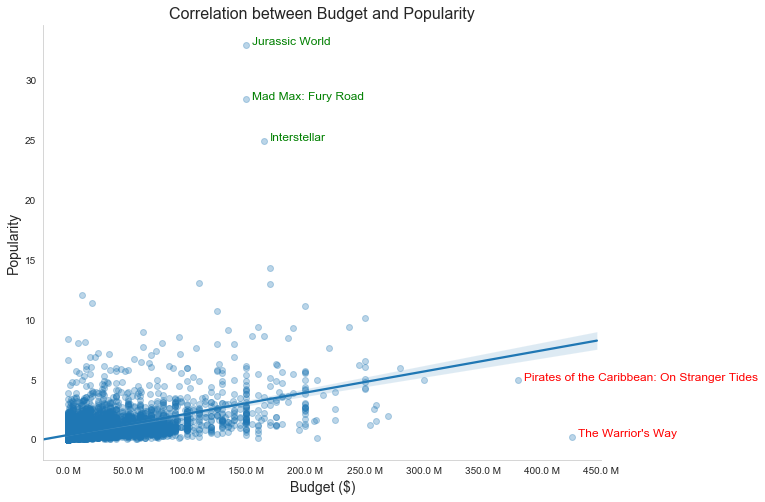

In [221]:
fig, ax = plt.subplots()
fig.set_size_inches(10,8)
sns.regplot(data = data, x='budget', y='popularity', scatter_kws={'alpha':0.3})
for side in ['right', 'top']:
    ax.spines[side].set_visible(False)
xticks_range = np.linspace(0, 450000000, 10)
xticks_label = [str(int(num)/1000000) + ' M' for num in xticks_range]
plt.xticks(ticks=xticks_range, labels=xticks_label)
plt.xlabel("Budget ($)", fontsize=14)
plt.ylabel("Popularity", fontsize=14)
plt.title("Correlation between Budget and Popularity", fontsize=16)
plt.text(data.budget[data.original_title == "Jurassic World"] + x_padding, 
         data.popularity[data.original_title == "Jurassic World"] , "Jurassic World", fontsize=12, color='green')
plt.text(data.budget[data.original_title == "Mad Max: Fury Road"] + x_padding, 
         data.popularity[data.original_title == "Mad Max: Fury Road"] , "Mad Max: Fury Road", fontsize=12, color='green');
plt.text(data.budget[data.original_title == "Interstellar"] + x_padding, 
         data.popularity[data.original_title == "Interstellar"] , "Interstellar", fontsize=12, color='green');
plt.text(data.budget[data.original_title == "The Warrior's Way"] + x_padding, 
         data.popularity[data.original_title == "The Warrior's Way"] , "The Warrior's Way", fontsize=12, color='red');
plt.text(data.budget[data.original_title == "Pirates of the Caribbean: On Stranger Tides"] + x_padding, 
         data.popularity[data.original_title == "Pirates of the Caribbean: On Stranger Tides"] ,
         "Pirates of the Caribbean: On Stranger Tides", fontsize=12, color='red');

In [179]:
xticks_range

array([0.0e+00, 5.0e+07, 1.0e+08, 1.5e+08, 2.0e+08, 2.5e+08, 3.0e+08,
       3.5e+08, 4.0e+08, 4.5e+08])

In [186]:
data[data.popularity > 20][['popularity', 'original_title', 'budget']]

,popularity,original_title,budget
0,32.985763,Jurassic World,150000000
1,28.419936,Mad Max: Fury Road,150000000
629,24.949134,Interstellar,165000000


In [219]:
data[data.budget > 350000000][['popularity', 'original_title', 'budget']]

,popularity,original_title,budget
2244,0.25054,The Warrior's Way,425000000
3375,4.95513,Pirates of the Caribbean: On Stranger Tides,380000000


In [220]:
data.popularity.corr(data.budget)

0.5454722315501879

* Correlation between budget and popularity is weak but positive. Most of the movies are made under 100 M budget. 
* More interesting to notice is movies like "Jurassic World", "Mad Max: Fury Road" and "Interstellar", they all are highly popular and made in mid budget around 150-200 million.
* Highest budget movies like "Pirates of the Caribbean: On Stranger Tides" and "The Warrior's Way" are not that much popular.

### Does higher budget movies earn more revenue?

C:\Users\davep\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


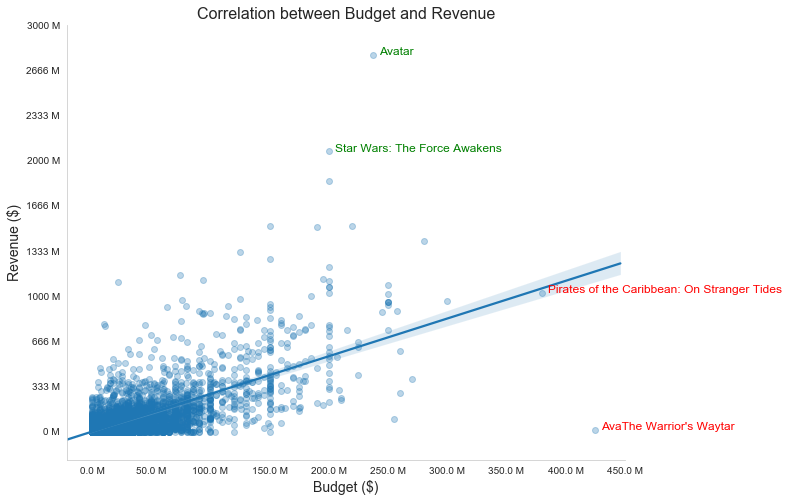

In [252]:
fig, ax = plt.subplots()
fig.set_size_inches(10,8)
sns.regplot(data = data, x='budget', y='revenue', scatter_kws={'alpha':0.3})
for side in ['right', 'top']:
    ax.spines[side].set_visible(False)
xticks_range = np.linspace(0, 450000000, 10)
xticks_label = [str(int(num)/1000000) + ' M' for num in xticks_range]
yticks_range = np.linspace(0, 3000000000, 10)
yticks_label = [str(int((num/1000000))) + ' M' for num in yticks_range]
plt.xticks(ticks=xticks_range, labels=xticks_label)
plt.yticks(ticks=yticks_range, labels=yticks_label)
plt.xlabel("Budget ($)", fontsize=14)
plt.ylabel("Revenue ($)", fontsize=14)
plt.title("Correlation between Budget and Revenue", fontsize=16)
plt.text(data.budget[data.original_title == "Star Wars: The Force Awakens"] + x_padding, 
         data.revenue[data.original_title == "Star Wars: The Force Awakens"] ,
         "Star Wars: The Force Awakens", fontsize=12, color='green')
plt.text(data.budget[data.original_title == "Avatar"] + x_padding, 
         data.revenue[data.original_title == "Avatar"] , "Avatar", fontsize=12, color='green')
plt.text(data.budget[data.original_title == "The Warrior's Way"] + x_padding, 
         data.revenue[data.original_title == "The Warrior's Way"] , "AvaThe Warrior's Waytar", fontsize=12, color='red')
plt.text(data.budget[data.original_title == "Pirates of the Caribbean: On Stranger Tides"] + x_padding, 
         data.revenue[data.original_title == "Pirates of the Caribbean: On Stranger Tides"] ,
         "Pirates of the Caribbean: On Stranger Tides", fontsize=12, color='red');

In [232]:
data[data.revenue > 1666000000][['revenue', 'original_title']]

,revenue,original_title
3,2068178225,Star Wars: The Force Awakens
1386,2781505847,Avatar
5231,1845034188,Titanic


In [251]:
data.revenue.corr(data.budget)

0.7349006819076118

* There is a significant positive correlation between budget and revenue. Movies like "Avatar" and "Star Wars: The Force Awakens" made highest revenue.

### Which directors associated with popular movie and highest popularity

* We will consider directors who made more or equal to 5 movies

In [277]:
directors_movie_count = data.director.value_counts()

In [278]:
directors_with_5_movies = directors_movie_count[directors_movie_count >= 5]

In [288]:
data.shape

(10866, 21)

In [286]:
data_director_with_5 = data[data.director.isin(directors_with_5_movies.index)]

In [287]:
data_director_with_5.shape

(4184, 21)

In [299]:
data_director_with_5.groupby('director')['revenue'].mean().sort_values(ascending=False)[:10]

director
David Yates          8.308591e+08
J.J. Abrams          7.158340e+08
Joss Whedon          5.926926e+08
James Cameron        5.841895e+08
George Lucas         5.527585e+08
Francis Lawrence     5.299966e+08
Carlos Saldanha      5.064904e+08
Peter Jackson        5.017881e+08
Michael Bay          4.470189e+08
Christopher Nolan    4.167549e+08
Name: revenue, dtype: float64

* Here we got top 10 directors whose movies makes highest revenue in general.

In [300]:
data_director_with_5.groupby('director')['popularity'].mean().sort_values(ascending=False)[:10]

director
Christopher Nolan    6.195521
J.J. Abrams          4.800957
George Miller        4.450001
Francis Lawrence     4.437604
Quentin Tarantino    4.187272
David Yates          4.163195
George Lucas         3.910306
Peter Jackson        3.774454
Robert Schwentke     3.641644
David Fincher        3.447978
Name: popularity, dtype: float64

* Top 10 director whose movies are generally popular.